In [1]:
import keras
import glob
import numpy as np
from sklearn.model_selection import train_test_split
#from keras.preprocessing.image import load_img, img_to_array
#from tensorflow.keras.utils import load_img
from tensorflow.keras import utils
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Flatten
#from keras.utils import plot_model #これはKerasのバージョンなどにより使えないのでコメントアウト
from keras.utils import np_utils #keras.utils.to_categoricalでエラーが出るので追加
from keras.optimizers import Adam # ここでエラーとなるので以下のコードに変更
#from tensorflow.keras.optimizers import Adam # 「tensorflow.」を追加
import matplotlib.pyplot as plt
import time


2023-01-11 09:50:15.691579: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
train_data_path = '/home/user/ダウンロード/' # ここを変更。Colaboratoryにアップロードしたzipファイルを解凍後の、データセットのフォルダ名を入力
image_size = 200 # ここを変更。必要に応じて変更してください。「28」を指定した場合、縦28横28ピクセルの画像に変換します。
color_setting = 1  #ここを変更。データセット画像のカラー：「1」はモノクロ・グレースケール。「3」はカラー。


In [3]:
folder = ['正面', 'その他'] # ここを変更。front正面 other それ以外

class_number = len(folder)
print('今回のデータで分類するクラス数は「', str(class_number), '」です。')
#3 データセットの読み込みとデータ形式の設定・正規化・分割 
X_image = []  
Y_label = [] 


今回のデータで分類するクラス数は「 2 」です。


In [4]:
for index, name in enumerate(folder):
  read_data = train_data_path + '/' + name + '/'
  files = glob.glob(read_data + '*.JPG') #ここを変更。png形式のファイルを利用する場合のサンプルです。
#  print('--- 読み込んだデータセットは', read_data, 'です。')

  for i, file in enumerate(files):  
    if color_setting == 1:
      img = utils.load_img(file, color_mode = 'grayscale' ,target_size=(image_size, image_size))  
    elif color_setting == 3:
      img = utils.load_img(file, color_mode = 'rgb' ,target_size=(image_size, image_size))
    array = utils.img_to_array(img)
    X_image.append(array)
    Y_label.append(index)
#  print(X_image)


In [5]:
X_image = np.array(X_image)
Y_label = np.array(Y_label)


In [6]:
X_image = X_image.astype('float32') / 255

In [7]:
#Y_label = keras.utils.to_categorical(Y_label, class_number) #Kerasのバージョンなどにより使えないのでコメントアウト
Y_label = np_utils.to_categorical(Y_label, class_number) #上記のコードのかわり


In [8]:
train_images, valid_images, train_labels, valid_labels = train_test_split(X_image, Y_label, test_size=0.30)
x_train = train_images
y_train = train_labels
x_test = valid_images
y_test = valid_labels


In [9]:
#4 機械学習（人工知能）モデルの作成 – 畳み込みニューラルネットワーク（CNN）・学習の実行等
model = Sequential()
model.add(Conv2D(16, (3, 3), padding='same',
          input_shape=(image_size, image_size, color_setting), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))               
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))                
model.add(Dropout(0.5))                                   
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))                                 
model.add(Dense(class_number, activation='softmax'))

model.summary()
#plot_model(model, to_file='model.png') #ここはKerasのバージョンなどにより使えないのでコメントアウト

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])


2023-01-11 09:52:21.703377: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-11 09:52:21.886522: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 16)      160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 100, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 128)     18560     
                                                                 
 conv2d_2 (Conv2D)           (None, 100, 100, 256)     295168    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 50, 50, 256)      0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 50, 50, 256)       0

Epoch 1/5
23/23 [==============================] - 108s 4s/step - loss: 1.8232 - accuracy: 0.6222 - val_loss: 0.6866 - val_accuracy: 0.8500
Epoch 2/5
23/23 [==============================] - 93s 4s/step - loss: 0.6464 - accuracy: 0.7556 - val_loss: 0.4409 - val_accuracy: 0.8500
Epoch 3/5
23/23 [==============================] - 93s 4s/step - loss: 0.7021 - accuracy: 0.7556 - val_loss: 0.6122 - val_accuracy: 0.8500
Epoch 4/5
23/23 [==============================] - 94s 4s/step - loss: 0.6388 - accuracy: 0.7556 - val_loss: 0.4402 - val_accuracy: 0.8500
Epoch 5/5
23/23 [==============================] - 91s 4s/step - loss: 0.4723 - accuracy: 0.7556 - val_loss: 0.5207 - val_accuracy: 0.8500


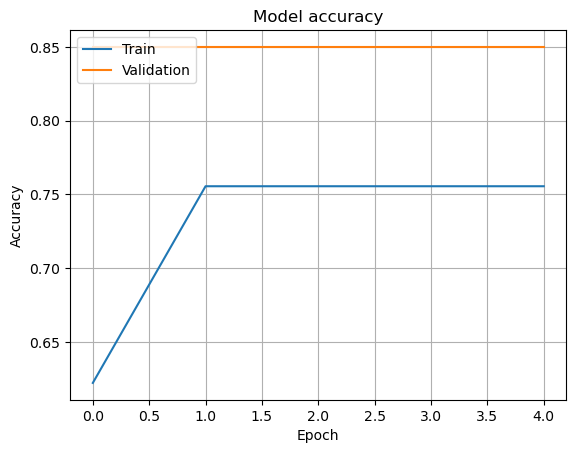

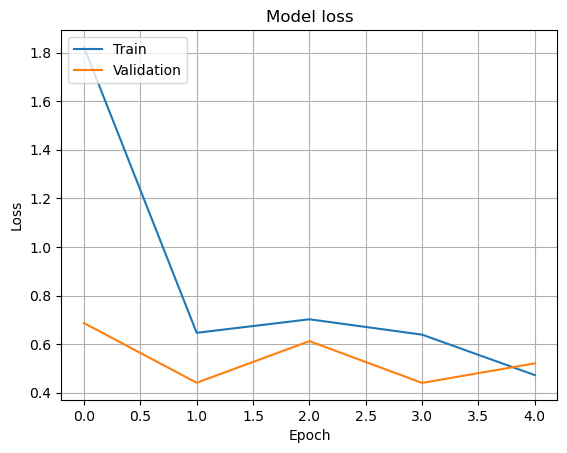

In [10]:
start_time = time.time()

# ここを変更。必要に応じて「batch_size=」「epochs=」の数字を変更してみてください。
history = model.fit(x_train,y_train, batch_size=2, epochs=5, verbose=1, validation_data=(x_test, y_test))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.grid()
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.grid()
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [11]:
open('cnn_model.json','w').write(model.to_json())
model.save_weights('cnn_weights.h5')
#model.save('cnn_model_weight.h5') #モデル構造と重みを1つにまとめることもできます


In [12]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Loss:', score[0], '（損失関数値 - 0に近いほど正解に近い）') 
print('Accuracy:', score[1] * 100, '%', '（精度 - 100% に近いほど正解に近い）') 
print('Computation time（計算時間）:{0:.3f} sec（秒）'.format(time.time() - start_time))


Loss: 0.520703911781311 （損失関数値 - 0に近いほど正解に近い）
Accuracy: 85.00000238418579 % （精度 - 100% に近いほど正解に近い）
Computation time（計算時間）:566.164 sec（秒）


: 